In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [12]:
# Parameter
xname = r"$n_s$"
xname_hat = r"$\hat n_s$"
xname_true = r"$n_{s, \mathrm{true}}$"

# Data 
x_hat = np.array([9.602328e-01 , 9.626497e-01 , 9.679204e-01 , 9.631926e-01 , 9.667345e-01 , 9.678800e-01 , 9.686459e-01 , 9.608378e-01 , 9.681314e-01 , 9.677940e-01 , 9.635666e-01 , 9.636044e-01 , 9.662835e-01 , 9.693716e-01 , 9.627486e-01 , 9.637739e-01 , 9.625532e-01 , 9.660951e-01 , 9.643273e-01 , 9.673362e-01 , 9.664108e-01 , 9.645472e-01 , 9.703282e-01 , 9.676276e-01 , 9.664456e-01 , 9.680606e-01 , 9.667998e-01 , 9.640013e-01 , 9.622959e-01 , 9.634531e-01 , 9.677191e-01 , 9.680838e-01 , 9.699781e-01 , 9.663044e-01 , 9.640710e-01 , 9.680944e-01 , 9.657709e-01 , 9.665227e-01 , 9.625615e-01 , 9.663241e-01 , 9.690900e-01 , 9.638822e-01 , 9.665983e-01 , 9.696601e-01 , 9.650982e-01 , 9.609132e-01 , 9.665003e-01 , 9.628341e-01 , 9.663726e-01 , 9.692462e-01 , 9.685954e-01 , 9.679107e-01 , 9.655612e-01 , 9.665099e-01 , 9.671972e-01 , 9.630985e-01 , 9.638316e-01 , 9.628602e-01 , 9.650509e-01 , 9.630287e-01 , 9.658088e-01 , 9.620629e-01 , 9.654720e-01 , 9.670311e-01 , 9.676878e-01 , 9.667838e-01 , 9.637819e-01 , 9.656572e-01 , 9.665891e-01 , 9.646178e-01 , 9.662807e-01 , 9.650627e-01 , 9.679417e-01 , 9.666870e-01 , 9.612512e-01 , 9.674445e-01 , 9.665211e-01 , 9.634180e-01 , 9.690690e-01 , 9.626642e-01 , 9.630641e-01 , 9.651782e-01 , 9.694719e-01 , 9.678851e-01 , 9.703834e-01 , 9.694135e-01 , 9.637855e-01 , 9.658692e-01 , 9.622785e-01 , 9.662904e-01 , 9.663156e-01 , 9.623617e-01 , 9.609832e-01 , 9.648084e-01 , 9.678590e-01 , 9.629145e-01 , 9.618452e-01 , 9.706275e-01 , 9.645571e-01 , 9.656664e-01 , 9.662970e-01 , 9.655754e-01 , 9.593679e-01 , 9.703079e-01 , 9.621213e-01 , 9.684259e-01 , 9.685424e-01 , 9.658822e-01 , 9.648774e-01 , 9.705216e-01 , 9.658901e-01 , 9.669622e-01 , 9.666365e-01 , 9.669708e-01 , 9.675502e-01 , 9.632040e-01 , 9.622470e-01 , 9.669180e-01 , 9.654249e-01 , 9.645135e-01 , 9.643580e-01 , 9.661008e-01 , 9.658662e-01 , 9.632069e-01 , 9.667404e-01 , 9.692494e-01 , 9.659019e-01 , 9.666680e-01 , 9.685555e-01 , 9.647028e-01 , 9.645156e-01 , 9.689381e-01 , 9.660189e-01 , 9.726976e-01 , 9.628450e-01 , 9.668473e-01 , 9.709680e-01 , 9.639403e-01 , 9.658168e-01 , 9.658819e-01 , 9.633339e-01 , 9.685443e-01 , 9.655690e-01 , 9.662586e-01 , 9.703464e-01 , 9.648888e-01 , 9.644977e-01 , 9.702578e-01 , 9.662212e-01 , 9.678051e-01 , 9.672997e-01 , 9.669822e-01 , 9.665097e-01 , 9.631520e-01 , 9.654053e-01 , 9.711699e-01 , 9.668653e-01 , 9.687153e-01 , 9.697649e-01 , 9.609435e-01 , 9.593195e-01 , 9.667619e-01 , 9.627546e-01 , 9.660185e-01 , 9.632811e-01 , 9.666057e-01 , 9.663107e-01 , 9.719400e-01 , 9.648449e-01 , 9.630042e-01 , 9.679241e-01 , 9.643368e-01 , 9.677477e-01 , 9.660752e-01 , 9.652125e-01 , 9.675770e-01 , 9.732675e-01 , 9.693616e-01 , 9.715043e-01 , 9.632757e-01 , 9.657713e-01 , 9.649767e-01 , 9.691744e-01 , 9.646615e-01 , 9.659487e-01 , 9.655180e-01 , 9.690044e-01 , 9.660181e-01 , 9.721142e-01 , 9.631011e-01 , 9.645040e-01 , 9.627438e-01 , 9.683149e-01 , 9.617576e-01 , 9.648239e-01 , 9.681495e-01 , 9.680183e-01 , 9.643448e-01 , 9.624834e-01 , 9.694886e-01 , 9.715412e-01 , 9.623929e-01 , 9.721253e-01 , 9.638954e-01 , 9.678992e-01 , 9.696159e-01 , 9.631716e-01 , 9.698052e-01 , 9.637393e-01 , 9.662940e-01 , 9.677714e-01 , 9.655809e-01 , 9.667217e-01 , 9.683585e-01 , 9.623595e-01 , 9.679990e-01 , 9.645521e-01 , 9.673300e-01 , 9.647677e-01 , 9.695258e-01 , 9.677343e-01 , 9.648204e-01 , 9.636187e-01 , 9.633692e-01 , 9.691157e-01 , 9.644646e-01 , 9.656236e-01 , 9.664769e-01 , 9.691775e-01 , 9.651730e-01 , 9.639892e-01 , 9.691488e-01 , 9.624385e-01 , 9.653792e-01 , 9.632626e-01 , 9.629378e-01 , 9.686302e-01 , 9.630667e-01 , 9.668025e-01 , 9.697442e-01 , 9.648156e-01 , 9.691945e-01 , 9.590809e-01 , 9.668633e-01 , 9.633129e-01 , 9.664425e-01 , 9.701067e-01 , 9.655240e-01 , 9.651391e-01 , 9.679171e-01])
lnL_hat = -np.array([337.11, 302.31, 284.12, 348.01, 308.59, 298.20, 291.44, 301.68, 301.41, 334.48, 305.42, 330.91, 308.54, 335.27, 310.60, 327.22, 293.95, 282.85, 315.08, 300.40, 318.65, 302.29, 274.24, 324.32, 331.11, 339.86, 306.88, 300.84, 291.13, 301.53, 308.45, 307.43, 301.82, 281.89, 304.59, 300.57, 293.01, 286.07, 309.80, 317.58, 306.42, 322.20, 294.94, 299.52, 305.21, 305.42, 330.55, 311.99, 301.54, 309.29, 305.77, 331.51, 283.71, 284.83, 298.66, 304.11, 288.28, 297.48, 312.23, 315.00, 316.73, 306.90, 329.21, 302.63, 289.85, 309.79, 293.64, 287.90, 307.85, 286.60, 313.02, 295.93, 316.27, 312.95, 306.78, 315.20, 298.33, 290.02, 320.48, 270.06, 305.88, 269.24, 307.95, 293.75, 333.21, 322.63, 310.70, 282.92, 323.52, 300.14, 334.24, 320.83, 300.57, 295.40, 309.21, 297.92, 269.37, 299.25, 318.89, 295.02, 300.93, 296.93, 312.69, 316.53, 306.51, 298.56, 320.22, 337.27, 294.05, 291.15, 287.47, 295.05, 286.98, 307.10, 292.12, 295.75, 314.61, 309.12, 333.45, 290.72, 315.37, 276.04, 333.69, 298.98, 340.89, 297.88, 284.57, 300.12, 302.04, 329.87, 310.90, 294.12, 309.93, 259.94, 316.38, 296.94, 288.32, 286.15, 311.59, 309.74, 304.00, 296.25, 304.04, 282.43, 310.46, 285.80, 292.99, 299.90, 311.27, 355.80, 308.46, 305.89, 291.99, 260.34, 297.82, 299.50, 277.17, 297.03, 270.76, 302.99, 312.69, 308.39, 312.61, 345.24, 296.26, 284.50, 291.19, 308.54, 334.55, 276.00, 317.67, 312.93, 286.12, 273.55, 303.51, 321.13, 319.75, 321.96, 273.93, 329.33, 259.33, 305.92, 317.27, 300.78, 318.63, 291.05, 275.60, 300.78, 289.54, 332.09, 310.92, 325.26, 340.61, 296.81, 319.50, 324.49, 342.71, 298.25, 279.63, 279.63, 340.04, 291.71, 308.07, 326.73, 314.96, 313.77, 296.57, 343.72, 267.13, 302.44, 310.14, 298.30, 308.19, 308.72, 307.75, 345.12, 304.67, 308.56, 300.04, 305.48, 285.34, 279.80, 306.44, 321.91, 315.15, 282.06, 315.38, 313.96, 309.68, 320.41, 300.75, 317.59, 311.16, 292.31, 306.75, 293.00, 299.85, 321.83, 315.89, 310.60, 305.52, 296.80, 311.31, 292.13, 303.25, 299.33, 296.26, 315.70, 297.46, 321.36])                
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([0.956, 0.958, 0.960, 0.96605, 0.968, 0.970, 0.972, 0.974, 0.976, 0.978])
chi2_asimov = 2*np.array([ 6.60,  4.23,  2.39,    0.00,  0.25,  1.02,  2.31,  4.12,  6.45,  9.31])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  6.860000000000014


In [13]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_true = 0.96605
x_lim = 0.01
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [14]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [15]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

0.0037360379881869483 130451.61840893661 0.9660544161270452
MLE:  0.9660544161270452
1 sigma:  0.0027686959421631685


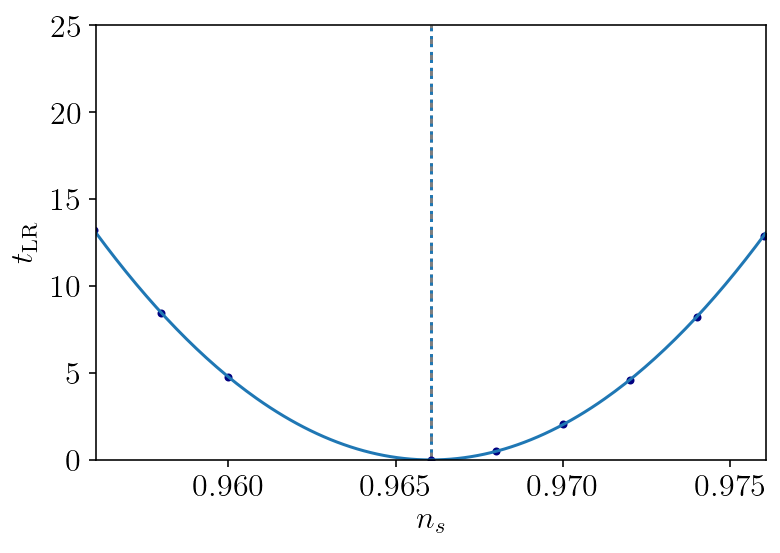

In [16]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a
print(a,b,c)

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.0,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])

plt.show()

In [17]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

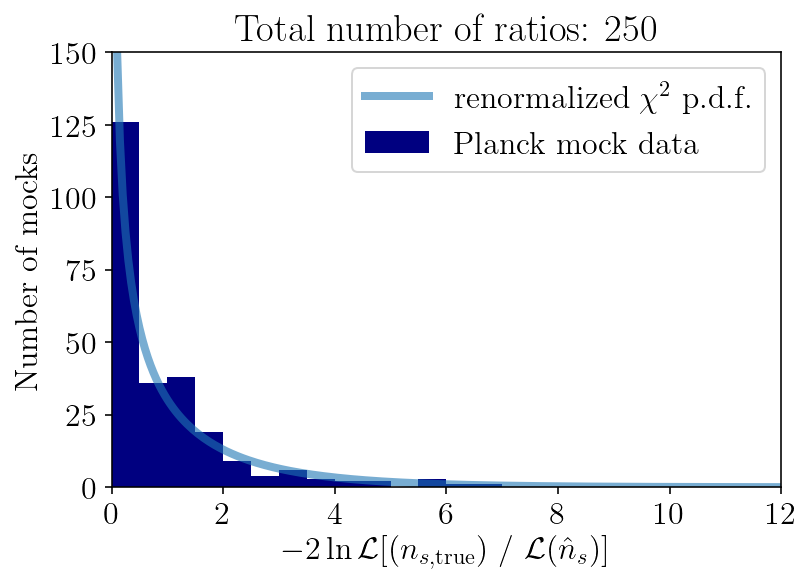

In [18]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln\mathcal{L}$[("+xname_true+r") / {$\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

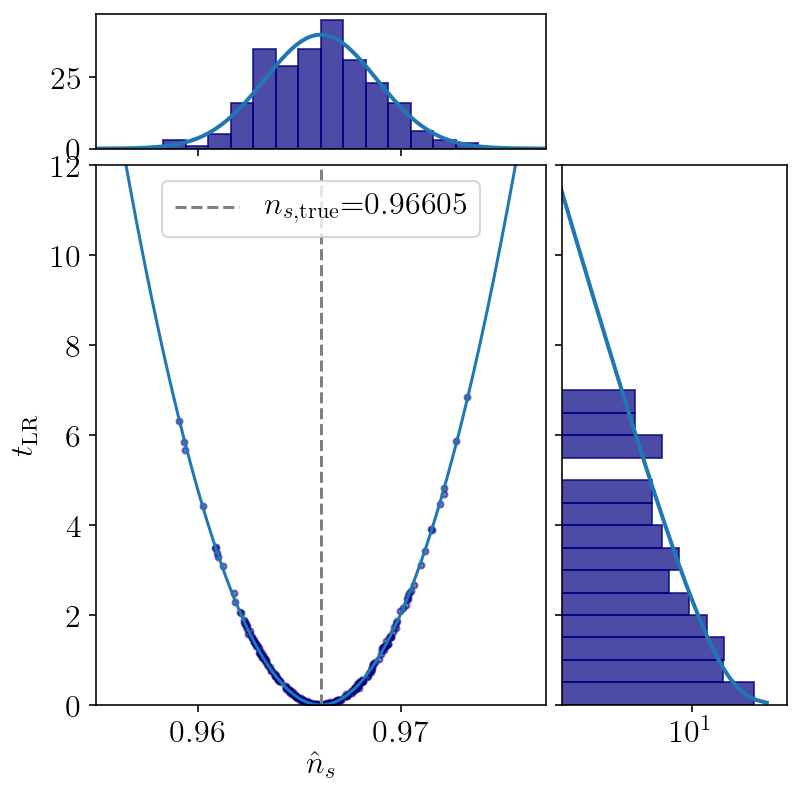

In [19]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="navy", marker=".", alpha=0.5)
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='tab:blue', ls='-')
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$ = $"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_n_s.pdf", format="PDF")
plt.show()

In [21]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 1.06
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

67.6 % of mocks below:  1.06


In [22]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.0027686959421631685
sigma_mocks:  0.0026691687196992576
